Лабораторная работа №5 (1). Используя явную и неявную конечно-разностные схемы, а также схему Кранка - Николсона, решить начально-краевую задачу для дифференциального уравнения параболического типа. Осуществить реализацию трех вариантов аппроксимации граничных условий, содержащих производные: двухточечная аппроксимация с первым порядком, трехточечная аппроксимация со вторым порядком, двухточечная аппроксимация со вторым порядком. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением U(x, t). Исследовать зависимость погрешности от сеточных параметров 𝜏, h.

вариант 5:

$$ \frac{ \partial u}{ \partial t} = \frac{ \partial ^ 2 u}{\partial  x ^ 2}  + \sin{\pi x} $$

$ u(0, t)=0    $    $ u(1, t)=0    $     $ u(x, 0)=0    $ 

Аналитическое решение:

$$ U(x, t)=  \frac{1}{\pi ^ 2}(1 - \exp{(-\pi ^ 2 t)}) \sin(\pi x)

Граничные условия первого рода при $x = 0, x = l$, в нашем случае $l = 1$

In [1]:
import matplotlib.pyplot as plt
import math
import typing


Bad key text.latex.preview in file c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default 

Существую граничные условия вида:

$$ \alpha \frac{\partial  u(0, t)}{\partial x} + \beta u(0, t) = \phi_0 (t) \\ \\
    \gamma \frac{\partial  u(l, t)}{\partial x} + \delta u(l, t) = \phi_l (t) $$

### Входные условия

In [2]:
left, right = 0, 1
alpha = 0
betta = 1
gamma = 0
delta = 1
a = 1 # u_xx
b = 0 # u_x
c = 0 #u 


In [3]:
def f(x, t):
    return math.sin(math.pi * x)

In [4]:
def phi_0(t):
    return 0
def phi_l(t):
    return 0

In [5]:
def psi(x):
    return 0

Аналитическое решение

In [6]:
def U(x, t):
    return 1/(math.pi ** 2) * (1 - math.exp((-math.pi ** 2) * t)) * math.sin(math.pi * x)

In [7]:
def real_U(X:list, T:list) -> list:
    n = len(X)
    m = len(T)
    U_true = [[0] * n for _ in range(m)]
    for k in range(m):
        for j in range(n):
            U_true[k][j] = U(X[j], T[k])
    return U_true

### Вспомогательные функции

Три графика

In [8]:
def plot_graphs(new_X:list, new_T:list, found_U:list, U_true:list, s:str='') -> None:
    plt.plot(new_X, U_true[len(new_T) // 4 ], color='blue', label='Аналитическое решение')
    plt.plot(new_X, found_U[len(new_T) // 4 ], color='red', label=s, linestyle='dashdot')
    plt.legend()
    plt.text(0.05, 0.1, s='t = ' + str(new_T[len(new_T) // 4]))
    plt.show()

    plt.plot(new_X, U_true[len(new_T) // 2 ], color='blue', label='Аналитическое решение')
    plt.plot(new_X, found_U[len(new_T) // 2 ], color='red', label=s, linestyle='dashdot')
    plt.legend()
    plt.text(0.05, 0.1, s='t = ' + str(new_T[len(new_T) // 2]))
    plt.show()

    plt.plot(new_X, U_true[len(new_T) - 1], color='blue', label='Аналитическое решение')
    plt.plot(new_X, found_U[len(new_T) - 1], color='red', label=s, linestyle='dashdot')
    plt.legend()
    plt.text(0.05, 0.1, s='t = ' + str(new_T[len(new_T) - 1]))
    plt.show()

рендж

In [9]:
def frange(start:float, stop:float, step:float) -> float:
    while start < stop:
        yield start
        start += step

Ошибка в зависимотсти от h

In [10]:
def error (U_my:list, U_true:list) -> float:
    return sum([abs(a - b) for a, b in zip(U_my, U_true)])
def get_error_array_with_h(N:list, left:float, right:float, a:float, b:float, c:float, alpha:float, betta:float, gamma:float, delta:float, find_u:typing.Callable, t_end:float=1, appoximation:int=1, tetta:float=-10) -> (list, list): # H, error
    H = [right/n for n in N]
    ERROR = []
    for n in N:
        if tetta == -10:
            XX, TT, UU = find_u(left, right, a, b, c, alpha, betta, gamma, delta, n=n, t_end=t_end, appoximation=appoximation)
        else:
            XX, TT, UU = find_u(left, right, a, b, c, alpha, betta, gamma, delta, n=n, t_end=t_end, appoximation=appoximation, tetta=tetta)
        U_true = real_U(XX, TT)
        t = len(TT) // 2
        ERROR.append(error(UU[t], U_true[t]))
    
    return H, ERROR

    

График ошибки в зависимости о h

In [11]:
def h_error_plot(H:list, ERROR:list) -> None:
    plt.plot(H, ERROR)
    plt.xlabel("h")
    plt.ylabel("error")
    plt.show()

получение T и X

In [12]:
def get_t(t0:float, t_end:float, tau:float) -> list:
    return [i for i in frange(t0, t_end + tau, tau)]

def get_x(x_0:float, x_l:float, h:float) -> list:
    return [i for i in frange(x_0, x_l + h, h)]

### Явная конечно разностная схема

Имеется уравнение вида $$ \frac{\partial u}{\partial t} = \alpha \frac{\partial ^2 u}{\partial x^2} + b \frac{\partial u}{\partial x} + cu + f(x, t)$$

решения для уравнения имеет вид
$$ \frac{u^{k+1}_j - u^{k}_j}{\tau} = \frac{u^{k}_{j+1} - 2u^{k}_{j} + u^{k}_{j - 1}}{h^2} + f^{k}_{j}$$
приведём его к будее удобному виду для итерации
$$u^{k+1}_j = \frac{\tau}{h^2}(u^{k}_{j+1} - 2u^{k}_{j} + u^{k}_{j - 1}) + \tau f^{k}_{j} +  u^{k}_j $$

Для начальных условий
$$u^{1}_j = \frac{\tau}{h^2}(u^{0}_{j+1} - 2u^{0}_{j} + u^{0}_{j - 1}) + \tau f^{0}_{j} +  u^{0}_j  $$
$ u^k_0 = \phi_0(t^k) $, $u^k_n = \phi_l(t^k) $, $ u^0_j = \Psi{(x_j)}$

Условие устойчивости $\sigma = \frac{\alpha^2 \tau}{h^2} <= \frac{1}{2}$

так как в моём варианте $\alpha = 1$ можно упростить условие до $\frac{ \tau}{h^2} < \frac{1}{2} \implies  \tau <= \frac{h^2}{2} $

$$u^{k+1}_j = \sigma u^{k}_{j+1} +(1 -2 \sigma) u^{k}_{j} + \sigma u^{k}_{j - 1} + \tau f^{k}_{j}   $$


In [13]:

def find_U_explicit(left:float, right:float, a:float, b:float, c:float, alpha:float, betta:float, gamma:float, delta:float, n:int=10, t_end:float=1, appoximation:int=1) -> (list, list, list):  # добавить апроксимацию
    def approx(appoximation:int, k:int):
        if appoximation == 1:
            U_values[k][0] = (h * phi_0(T[k]) - alpha * U_values[k][1])/(h * betta - alpha)
            U_values[k][-1] = (h * phi_l(T[k]) + gamma * U_values[k][-2] )/(h * delta + gamma)
        elif appoximation == 2:
            U_values[k][0] = (h * (2 * a - b * h) * phi_0(T[k]) - 2 * alpha * a * U_values[k][1] - alpha * (h**2) * U_values[k-1][0] / tau) / (alpha * c * (h**2) + betta * h * (2 * a - b * h) - 2 * alpha * a - alpha * (h**2) / tau)
            U_values[k][-1] = (h * (2 * a + b * h) * phi_l(T[k]) + 2 * gamma * a * U_values[k][-2] + gamma * (h**2) * U_values[k-1][-1] / tau) / (2 * gamma * a + gamma * (h**2) / tau - c * gamma * (h**2) + delta * h * (2 * a + b * h))
        elif appoximation == 3:
            U_values[k][0] = (2 * h * phi_0(T[k]) - 4 * alpha * U_values[k][1] + alpha * U_values[k][2]) / (2 * h * betta - 3*alpha)
            U_values[k][-1] = (2 * h * phi_l(T[k]) + 4 * gamma * U_values[k][-2] - gamma * U_values[k][-3]) / (2 * h * delta + 3 * gamma)
            
    n = n + 1 # n + начальные условия
    h = right / (n - 1)
    tau = (h**2) / 2 / a ** 2  # для того, чтобы выполнялось условие устойчивости
    sigma = tau  / h**2
    X = get_x(left, right, h)
    T =  get_t(0, t_end, tau)


    m = len(T)
    U_values = [[0] * n for _ in range(m)]  # cеточные значения
 

    for j in range(n):
        U_values[0][j] = psi(X[j])

    for j in range(m):
        U_values[j][0] = phi_0(T[j])
        U_values[j][n-1] = phi_l(T[j])
    
    for k in range(1, m):
        for j in range(1, n-1):
            U_values[k][j] = sigma * U_values[k-1][j + 1] + (1 - 2 * sigma) * U_values[k-1][j] + sigma * U_values[k-1][j-1] + tau * f(X[j], T[k-1])
            
    approx(appoximation, len(T) - 1)
    
    return X, T, U_values

демонтрация работы алгоритма

In [14]:
XX, TT, UU = find_U_explicit(left, right, a, b, c, alpha, betta, gamma, delta, n=25, t_end=15, appoximation=1)
U_true = real_U(XX, TT)

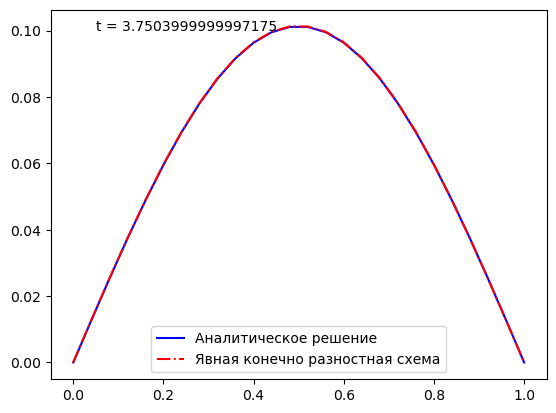

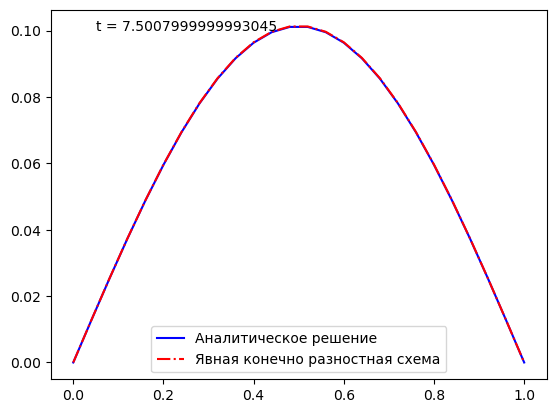

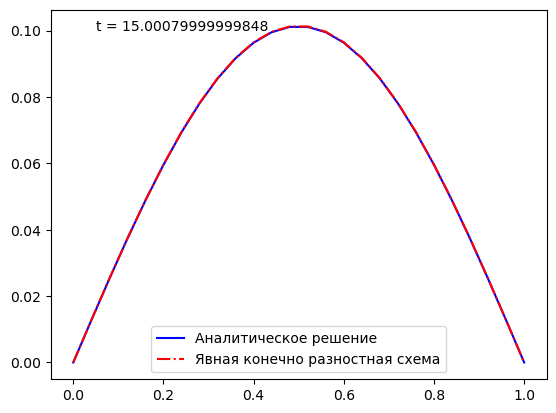

In [15]:
plot_graphs(XX, TT, UU, U_true, 'Явная конечно разностная схема')

Ошибка и её значение от h

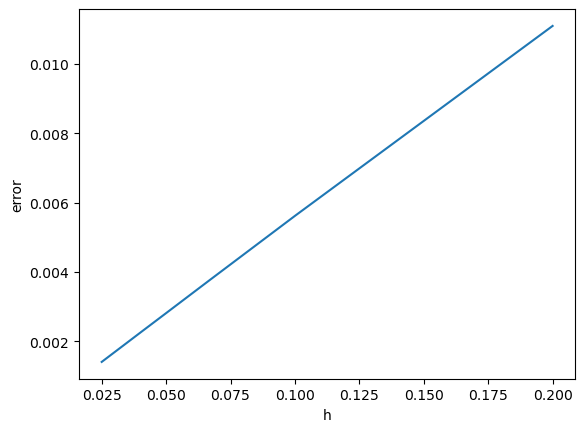

In [16]:
N = [5, 10, 15, 20, 25, 30, 35, 40]
H, ERROR = get_error_array_with_h(N, left, right, a, b, c, alpha, betta, gamma, delta, find_U_explicit, t_end=1, appoximation=1)
h_error_plot(H, ERROR)

### Неявная конечно разностная схема

решения для уравнения имеет вид
$$ \frac{u^{k+1}_j - u^{k}_j}{\tau} = \frac{u^{k+1}_{j+1} - 2u^{k+1}_{j} + u^{k+1}_{j - 1}}{h^2} + f^{k+1}_{j}$$
приведём его к будее удобному виду для итерации
$$u^{k+1}_j = \frac{\tau}{h^2}(u^{k+1}_{j+1} - 2u^{k+1}_{j} + u^{k+1}_{j - 1}) + \tau f^{k+1}_{j} +  u^{k}_j $$
Для начальных условий
$$u^{1}_j = \frac{\tau}{h^2}(u^{1}_{j+1} - 2u^{1}_{j} + u^{1}_{j - 1}) + \tau f^{1}_{j} +  u^{0}_j  $$
$ u^{k+1}_0 = \phi_0(t^{k+1}) $,  $u^{k+1}_n = \phi_l(t^{k+1}) $,  $ u^0_j = \Psi{(x_j)}$

In [17]:
def solve_PQ(A0:list, A1:list, A2:list, B:list) -> list:
    P = [-A2[0] / A1[0]]
    Q = [B[0] / A1[0]]
    for i in range(1, len(B)):
        P.append(-A2[i] / (A1[i] + A0[i] * P[i - 1]))
        Q.append((B[i] - A0[i] * Q[i - 1]) / (A1[i] + A0[i] * P[i - 1]))

    res = [Q[-1]]

    for i in range(len(B) - 2, -1, -1):
        res.append(P[i] * res[-1] + Q[i])

    return res[::-1]

In [18]:
def find_U_implicit(left:float, right:float, a:float, b:float, c:float, alpha:float, betta:float, gamma:float, delta:float, n:int=10, t_end:float=1, appoximation:int=1) -> (list, list, list):
    def approx(appoximation:int, k:int):
        if appoximation == 1:
            A1[0] = (betta - alpha) / h
            A2[0] = alpha / h
            B[0] = phi_0(T[k+1]) / (betta - alpha / h)

            A0[-1] = -gamma / h
            A1[-1] = delta + gamma / h
            B[-1] = phi_l(T[k+1]) / (delta + gamma / h)
        if appoximation == 2:
            
            A1[0] = 2 * a / h + h / tau - c * h - betta * (2 * a - b * h) / alpha
            A2[0] = - 2 * a / h
            B[0] = h * U[k-1][0] / tau -  phi_0(T[k]) * (2 * a - b * h) / alpha

            A0[-1] = - 2 * a / h
            A1[-1] = 2 * a / h + h / tau - c * h + delta * (2 * a + b * h) / gamma
            B[-1] = h * U[k-1][-1] / tau + phi_l(T[k]) * (2 * a + b * h) / gamma
        if appoximation == 3:
            A1[0] = 2 * betta * h - 3 * alpha
            A2[0] = 4 * alpha
            B[0] = 2 * h * phi_0(T[k+1])

            A0[-1] = -4 * gamma
            A1[-1] = 2 * h * delta + 3 * gamma
            B[-1] = 2 * h * phi_l(T[k+1])

    if alpha == 0 and appoximation == 2:
        appoximation = 3
    n = n + 1 # n + начальные условия
    h = right / (n - 1)
    tau = (h**2) / 2 / a**2  # для того, чтобы выполнялось условие устойчивости
    sigma = tau  / h**2
    X = get_x(left, right, h)
    T =  get_t(0, t_end, tau)
        

    m = len(T)
    U_values = [[0] * n for _ in range(m)]  # cеточные значения
        
    for k in range(m-1):
        A0 = [0 for _ in range(n)]
        A1 = [0 for _ in range(n)]
        A2 = [0 for _ in range(n)]
        B = [0 for _ in range(n)]

        for j in range(1, n-1):
            A0[j] = sigma
            A1[j] = -(1 + 2*sigma)
            A2[j] = sigma
            B[j] = -U_values[k][j] - f(X[j], T[k]) * tau
        approx(appoximation, k)
        U_values[k+1] = solve_PQ(A0, A1, A2, B)
    return X, T, U_values

Демонстрация работы

In [19]:
XX2, TT2, UU2 = find_U_implicit(left, right, a, b, c, alpha, betta, gamma, delta, n=25, t_end=15, appoximation=1)
U_true2 = real_U(XX2, TT2)

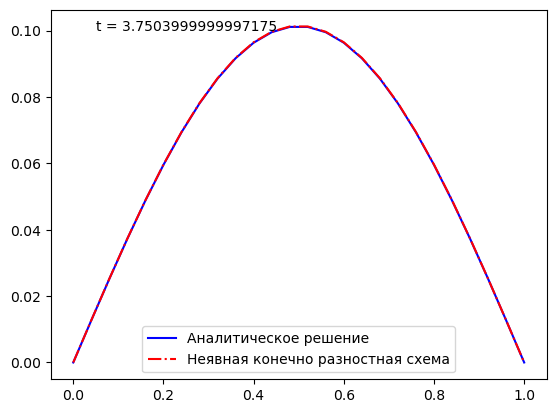

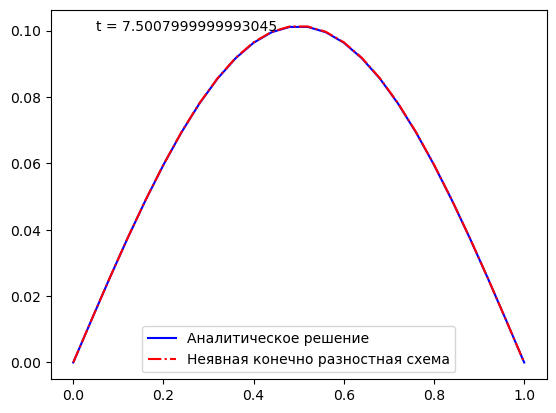

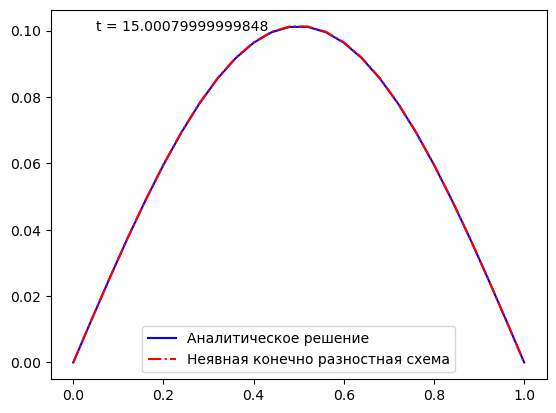

In [20]:
plot_graphs(XX2, TT2, UU2, U_true2, 'Неявная конечно разностная схема')

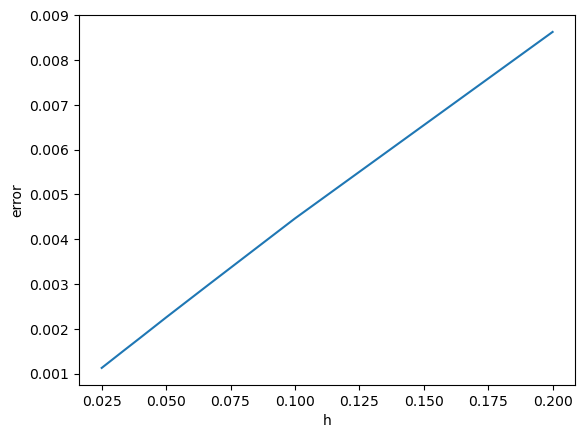

In [21]:
N = [5, 10, 15, 20, 25, 30, 35, 40]
H, ERROR = get_error_array_with_h(N, left, right, a, b, c, alpha, betta, gamma, delta, find_U_implicit, t_end=1, appoximation=1)
h_error_plot(H, ERROR)

### Cхема Кранка - Николсона

In [22]:
def Krank_Nikolson(left:float, right:float, a:float, b:float, c:float, alpha:float, betta:float, gamma:float, delta:float, n:int=10, t_end:float=1, appoximation:int=1, tetta:float=0.3) -> list:
    if tetta < 0 or tetta > 1:
        print('Тетта лежит на отрезке [0, 1]')
        return
    if alpha == 0 and appoximation == 2:
        appoximation = 3
    X, T, U_explicit = find_U_explicit(left, right, a, b, c, alpha, betta, gamma, delta, n, t_end, appoximation=appoximation)
    X2, T2, U_implicit = find_U_implicit(left, right, a, b, c, alpha, betta, gamma, delta, n, t_end, appoximation=appoximation)
    m = len(U_implicit)
    n = len(U_implicit[0])
    U_values = [[0] * n for _ in range(m)]

    for k in range(m):
        for j in range(n):
            U_values[k][j] = tetta * U_implicit[k][j] + (1 - tetta) * U_explicit[k][j]
            
    return X2, T2, U_values



 Демонстрация с разными параметрами

In [23]:
tetta = 0.5

In [24]:
XX3, TT3, UU3 = Krank_Nikolson(left, right, a, b, c, alpha, betta, gamma, delta, n=25, t_end=20, appoximation=1, tetta=tetta)
U_true2 = real_U(XX3, TT3)

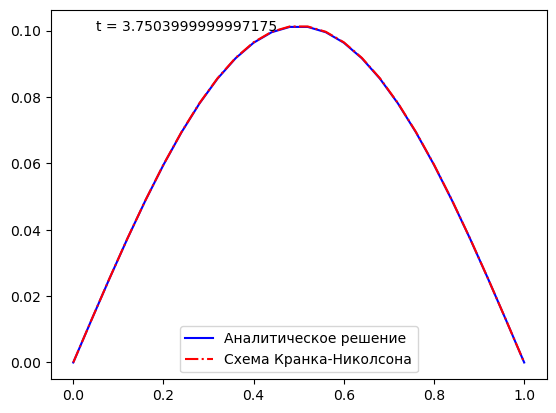

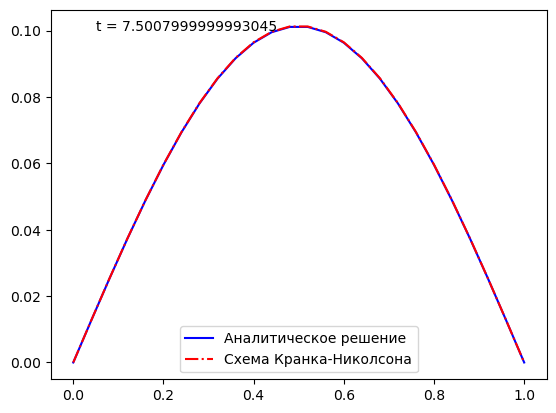

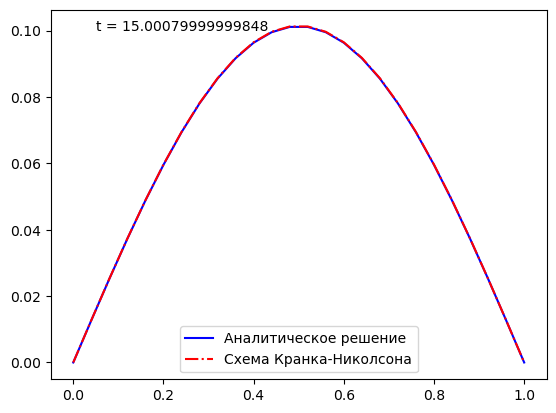

In [25]:
plot_graphs(XX2, TT2, UU2, U_true2, 'Схема Кранка-Николсона')

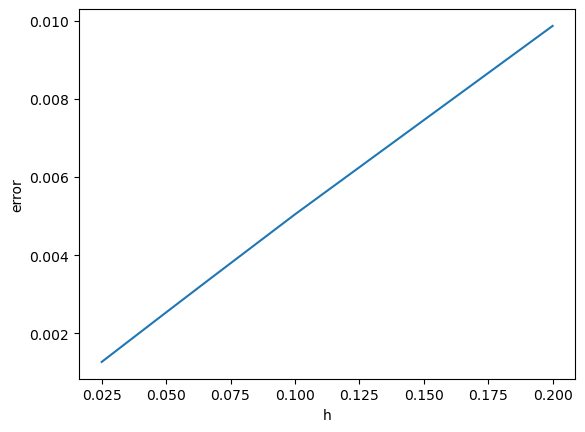

In [26]:
N = [5, 10, 15, 20, 25, 30, 35, 40]
H, ERROR = get_error_array_with_h(N, left, right, a, b, c, alpha, betta, gamma, delta, Krank_Nikolson, t_end=1, appoximation=1, tetta=tetta)
h_error_plot(H, ERROR)